In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
img = nib.load('data/training/slices/img/img0001_120.nii.gz').get_fdata()
label = nib.load('data/training/slices/label/label0001_120.nii.gz').get_fdata()

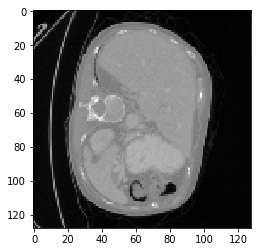

In [3]:
%matplotlib inline
plt.imshow(img, cmap='gray')

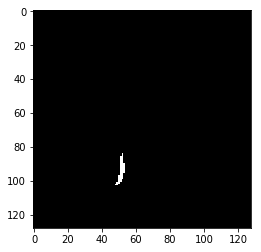

In [4]:
%matplotlib inline
plt.imshow(label, cmap='gray')

In [5]:
img_original = nib.load('data/training/img/img0001.nii.gz').get_fdata()[:,:,120]
label_original =  nib.load('data/training/label/label0001.nii.gz').get_fdata()[:,:,120]

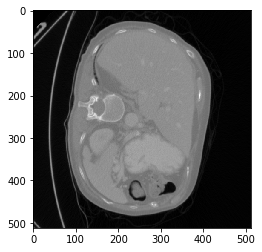

In [6]:
%matplotlib inline
plt.imshow(img_original, cmap='gray')

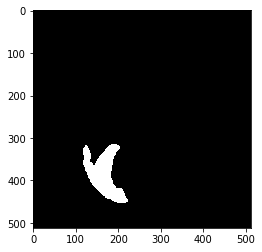

In [9]:
%matplotlib inline
spleen_original = label_original
spleen_original[np.where(spleen_original != 1)] = 0
plt.imshow(spleen_original, cmap='gray')